In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
# Question 1

from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()

#print (iris)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

#df = pd.DataFrame({'sepal length': data[:, 0], 'sepal width': data[:, 1],'petal length': data[:, 2],'petal width': data[:, 3]})

df.describe()
df.head(5)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


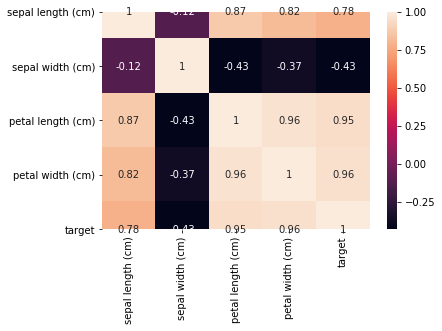

In [15]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, annot=True)

# Sepal length has high co-relation with petal length and petal width
# Petal width and petal length has high co-relation
# Niave bayes works better when the co-relation between features is less than 0.6


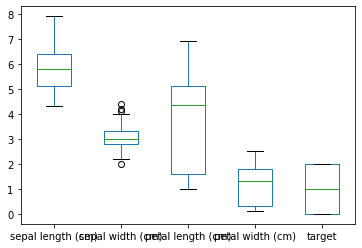

In [18]:
#outlier anaylsis
ax = df.plot.box()

# very few outliers, can be neglected

In [35]:
# Implementing Naive Bayes

y = df[['target']]
X = df.drop(['target'], axis=1)

# only independent variables
X.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42,stratify = y)


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
pred_test = gnb.fit(X_train, y_train).predict(X_test)



test_score = accuracy_score(pred_test, y_test)
print('test score : ',test_score)

from sklearn.metrics import classification_report

print (classification_report(y_test, pred_test))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


test score :  0.9666666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Question 2 

In [71]:

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header = None)


data.describe()
data.columns = ['a','b','c','d','e','f','g']
print('0', data['a'].unique())
print('1', data['b'].unique())
print('2', data['c'].unique())
print('3', data['d'].unique())
print('4', data['e'].unique())
print('5', data['f'].unique())
print('6', data['g'].unique())


data['a'] = data['a'].map({'low': 1, 'med': 2,'high':3,'vhigh':4})
data['b'] = data['b'].map({'low': 1, 'med': 2,'high':3,'vhigh':4})
data['c'] = data['c'].map({'5more': 5,'2':2,'3':3,'4':4})
data['d'] = data['d'].map({'more': 5,'2':2,'4':4})
data['e'] = data['e'].map({'small': 1, 'med': 2,'big':3})
data['f'] = data['f'].map({'low': 1, 'med': 2,'high':3})
data['g'] = data['g'].map({'unacc': 1, 'acc': 2,'good':3,'vgood':4})


data.head()
data.info()


,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,small,med,unacc
freq,432,432,432,576,576,576,1210


0 ['vhigh' 'high' 'med' 'low']
1 ['vhigh' 'high' 'med' 'low']
2 ['2' '3' '4' '5more']
3 ['2' '4' 'more']
4 ['small' 'med' 'big']
5 ['low' 'med' 'high']
6 ['unacc' 'acc' 'vgood' 'good']


,a,b,c,d,e,f,g
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
a    1728 non-null int64
b    1728 non-null int64
c    1728 non-null int64
d    1728 non-null int64
e    1728 non-null int64
f    1728 non-null int64
g    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


In [72]:
y = data[['g']]
X = data.drop(['g'], axis=1)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X.shape)

X_train, X_test, y_train, y_test = train_test_split(scaled_X , y, test_size=0.3, random_state=42,stratify =y)

print(X_train.shape, y_train.shape)

from sklearn.model_selection import GridSearchCV


(1728, 6)
(1209, 6) (1209, 1)


In [73]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
c_values = np.arange(1, 100)

param_grid = [
     {
         "C": c_values,
         "penalty": ["l1"],
         "solver": ["liblinear"],
         "multi_class": ["ovr"],
         "random_state": [42],
     },
     {
         "C": c_values,
         "penalty": ["l2"],
         "solver": ["liblinear", "newton-cg", "lbfgs"],
         "multi_class": ["ovr"],
         "random_state": [42],
     }
 ]
grid = GridSearchCV(
     LogisticRegression(),
     param_grid,
     cv=10,
     scoring='f1_micro' ,
     verbose=0
 )

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([ 1,  2,  3,  4...
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99

{'C': 39, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
0.8395368072787428


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


log_reg = LogisticRegression(C=39.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg_predict_proba = log_reg.predict_proba(X_test)[:, 1]
# print(log_reg_predict_proba)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
# print('AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict_proba) * 100))
print('Classification report:\n\n', classification_report(y_test, log_reg_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(log_reg.score(X_test, y_test) * 100))

LogisticRegression(C=39.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 81.31%
Classification report:

               precision    recall  f1-score   support

           1       0.87      0.95      0.91       363
           2       0.64      0.56      0.60       115
           3       0.22      0.10      0.13        21
           4       0.86      0.60      0.71        20

    accuracy                           0.81       519
   macro avg       0.65      0.55      0.59       519
weighted avg       0.79      0.81      0.80       519

Training set score: 84.20%
Testing set score: 81.31%
